In [28]:
import matplotlib.pyplot as plt

# Compare classical Stern vs Stern Improved (Idea I)

In [13]:
def std_stern(n,k,w):
    
    min_cost = 10000000000000000000
    for p in range(1,min(10, floor(w/2))):
        for ell in range(1,min(10, n-k)):
            if p > floor((k+ell)/2): #weight is too large
                continue;
                
            L = N(log(binomial(round((k+ell)/2),p),2)) #list size
            M = 2*L - ell #number of collisions
            
            pr_iter = log(binomial(round((k+ell)/2),p)^2*binomial(n-k-ell,w-2*p)/binomial(n,w),2) #pr iter is successful
            
            cost = max(L, M)-pr_iter
            
            if cost< min_cost:
                min_cost = cost/n
                
    return min_cost

# Cost of our idea I

We consider a $(u, v)$-regular LDPC code (column weight is $u$, row weight is $v$)
For the number of columns in $\mathbf A$, we consider the worst case (i.e., maximum number of columns)

In [36]:
def new_stern_1(n,k,w,u,v):
    
    min_cost = 10000000000000000000
    
    for p in range(1,min(10, floor(w/2))):
        for ell in range(1,min(100, n-k)):
            
            k_prime = ell*v
            if k_prime <k: #number of columns is not large enough
                continue;
            
            if k_prime >n:
                continue;
                
            if p > floor((k_prime)/2): #weight is too large
                continue;
                
            L = N(log(binomial(round((k_prime)/2),p),2)) #list size
            M = 2*L - ell #number of collisions
            
            pr_iter = N(log(binomial(round((k_prime)/2),p)^2*binomial(n-k_prime,w-2*p)/binomial(n,w),2)) #pr iter is successful
            
            cost = max(L, M)-pr_iter
            
            if cost<min_cost:
                min_cost = cost/n
              #  print(p, ell, L, M, pr_iter)
    return min_cost

# Now, we consider different code rates and compare new idea with classical version of Stern

We select only the column weight (which we indicate as a ratio of the number of rows)
The corresponding row weight is computed as
$v = \frac{u}{1-R}$

In [37]:
def gv_bound(n,k):
    
    w = 1
    num_syn = 2^(n-k)
    while binomial(n,w)<num_syn:
        w+=1
        
    return w


u_ratio = 0.05 #%only a fraction 1/10 of the ones in each column is equal to 1
n = 1000 #code length

stern_vals = []
our_vals = []

for R_int in range(20,81,5):
    
    R = R_int/100
    
    #get code parameters
    k = round(n*R)
    u = round(u_ratio*n*(1-R))
    v = round(u/(1-R))
    
    #get code min distance
    w = gv_bound(n,k) 
    
    #Cost of classical stern
    cost = std_stern(n,k,w)
    stern_vals.append([R, cost])
    
    if u<2:
        continue;
        
    #Cost of classical stern
    new_cost = new_stern_1(n,k,w,u,v)
    our_vals.append([R, new_cost])
    print(N(R), N(cost), N(new_cost))
    

/tmp/ipykernel_5115/1348900874.py:9: DeprecationWarning: the default rounding for rationals, currently `away`, will be changed to `even`.
See https://github.com/sagemath/sage/issues/35473 for details.
  L = N(log(binomial(round((k+ell)/Integer(2)),p),Integer(2))) #list size
/tmp/ipykernel_5115/1348900874.py:12: DeprecationWarning: the default rounding for rationals, currently `away`, will be changed to `even`.
See https://github.com/sagemath/sage/issues/35473 for details.
  pr_iter = log(binomial(round((k+ell)/Integer(2)),p)**Integer(2)*binomial(n-k-ell,w-Integer(2)*p)/binomial(n,w),Integer(2)) #pr iter is successful
/tmp/ipykernel_5115/4006551941.py:18: DeprecationWarning: the default rounding for rationals, currently `away`, will be changed to `even`.
See https://github.com/sagemath/sage/issues/35473 for details.
  L = N(log(binomial(round((k_prime)/Integer(2)),p),Integer(2))) #list size
/tmp/ipykernel_5115/4006551941.py:21: DeprecationWarning: the default rounding for rationals, cur

0.200000000000000 0.0949133224756165 0.0913858102470792
0.250000000000000 0.106321742507905 0.104289764370781
0.300000000000000 0.114556350358772 0.109099492683798
0.350000000000000 0.120407307042236 0.116994049072901
0.400000000000000 0.124687533561800 0.117638225921575
0.450000000000000 0.126214177573701 0.122455183516676
0.500000000000000 0.125087478354427 0.117763240098852
0.550000000000000 0.122703744142056 0.118997190808176
0.600000000000000 0.118134768145686 0.110588522752538
0.650000000000000 0.111456833220898 0.107713842852257
0.700000000000000 0.104603717465314 0.0968720548945701
0.750000000000000 0.0940603213772507 0.0944869370658660
0.800000000000000 0.0814511010329282 0.0735727795895165


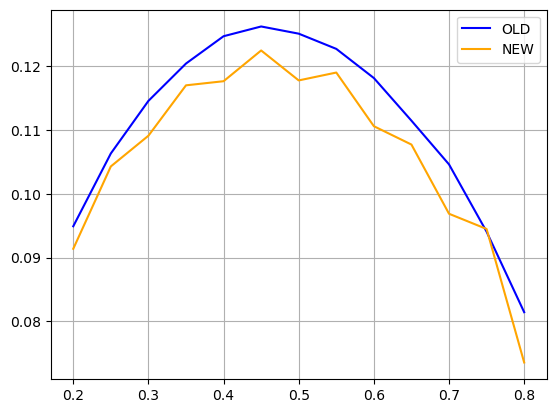

In [38]:
x,y=zip(*stern_vals)
plt.plot(x,y, c='blue',label='OLD')
x,y=zip(*our_vals)
plt.plot(x,y, c='orange',label='NEW')
plt.legend()
plt.grid(True)
plt.show()